#### SDK 클론 + 의존성 설치

In [ ]:
%cd /content
!git clone https://github.com/ori-mrg/robotcar-dataset-sdk.git

# 기본 패키지
!pip -q install numpy opencv-python matplotlib pandas

/content
Cloning into 'robotcar-dataset-sdk'...
remote: Enumerating objects: 302, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 302 (delta 44), reused 38 (delta 38), pack-reused 241 (from 1)
Receiving objects: 100% (302/302), 67.54 MiB | 37.94 MiB/s, done.
Resolving deltas: 100% (119/119), done.


#### 구글 드라이브 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 데이터 경로 지정 & 구조 파악

In [ ]:
from pathlib import Path
import zipfile
import os

BASE_DIR = Path("/content/drive/MyDrive/AICV/OD")
ZIP_PATH = BASE_DIR / "oxford_radar_robotcar_dataset_sample_medium.zip"
EXTRACT_DIR = BASE_DIR / "robotcar_large_sample"

if not EXTRACT_DIR.exists():
    print("[INFO] Extracting zip file...")
    with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
        zip_ref.extractall(EXTRACT_DIR)
    print("[INFO] Extraction done.")
else:
    print("[INFO] Dataset already extracted.")

DATA_ROOT = str(EXTRACT_DIR)
print("DATA_ROOT =", DATA_ROOT)


[INFO] Dataset already extracted.
DATA_ROOT = /content/drive/MyDrive/AICV/OD/robotcar_large_sample


In [ ]:
# (A) 최상위만 간단히
!ls -al "{DATA_ROOT}" | head -n 50

# (B) 2~3 depth 정도만 30줄 보기
!find "{DATA_ROOT}" -maxdepth 3 -type d | head -n 30

total 4
drwx------ 2 root root 4096 Jan 12 01:47 2019-01-10-14-36-48-radar-oxford-10k-partial
/content/drive/MyDrive/AICV/OD/robotcar_large_sample
/content/drive/MyDrive/AICV/OD/robotcar_large_sample/2019-01-10-14-36-48-radar-oxford-10k-partial
/content/drive/MyDrive/AICV/OD/robotcar_large_sample/2019-01-10-14-36-48-radar-oxford-10k-partial/gps
/content/drive/MyDrive/AICV/OD/robotcar_large_sample/2019-01-10-14-36-48-radar-oxford-10k-partial/gt
/content/drive/MyDrive/AICV/OD/robotcar_large_sample/2019-01-10-14-36-48-radar-oxford-10k-partial/vo
/content/drive/MyDrive/AICV/OD/robotcar_large_sample/2019-01-10-14-36-48-radar-oxford-10k-partial/lms_front
/content/drive/MyDrive/AICV/OD/robotcar_large_sample/2019-01-10-14-36-48-radar-oxford-10k-partial/lms_rear
/content/drive/MyDrive/AICV/OD/robotcar_large_sample/2019-01-10-14-36-48-radar-oxford-10k-partial/mono_left
/content/drive/MyDrive/AICV/OD/robotcar_large_sample/2019-01-10-14-36-48-radar-oxford-10k-partial/mono_rear
/content/drive/MyDri

In [ ]:
!find "{DATA_ROOT}" -name "*.timestamps" | head -n 50

/content/drive/MyDrive/AICV/OD/robotcar_large_sample/2019-01-10-14-36-48-radar-oxford-10k-partial/lms_front.timestamps
/content/drive/MyDrive/AICV/OD/robotcar_large_sample/2019-01-10-14-36-48-radar-oxford-10k-partial/lms_rear.timestamps
/content/drive/MyDrive/AICV/OD/robotcar_large_sample/2019-01-10-14-36-48-radar-oxford-10k-partial/mono_left.timestamps
/content/drive/MyDrive/AICV/OD/robotcar_large_sample/2019-01-10-14-36-48-radar-oxford-10k-partial/mono_rear.timestamps
/content/drive/MyDrive/AICV/OD/robotcar_large_sample/2019-01-10-14-36-48-radar-oxford-10k-partial/mono_right.timestamps
/content/drive/MyDrive/AICV/OD/robotcar_large_sample/2019-01-10-14-36-48-radar-oxford-10k-partial/radar.timestamps
/content/drive/MyDrive/AICV/OD/robotcar_large_sample/2019-01-10-14-36-48-radar-oxford-10k-partial/stereo.timestamps
/content/drive/MyDrive/AICV/OD/robotcar_large_sample/2019-01-10-14-36-48-radar-oxford-10k-partial/velodyne_left.timestamps
/content/drive/MyDrive/AICV/OD/robotcar_large_sampl

#### 공통 유틸 (timestamps)

In [ ]:
import os
import numpy as np

def load_timestamps(ts_path):
    ts = []
    with open(ts_path, "r") as f:
        for line in f:
            if not line.strip():
                continue
            ts.append(int(line.split()[0]))
    return np.array(ts, dtype=np.int64)

def nearest_ts(ts_array, t):
    idx = np.searchsorted(ts_array, t)
    if idx == 0:
        return ts_array[0]
    if idx >= len(ts_array):
        return ts_array[-1]
    before, after = ts_array[idx-1], ts_array[idx]
    return before if abs(t - before) <= abs(after - t) else after


#### SDK import

In [ ]:
import sys
import os

SDK_ROOT = "/content/robotcar-dataset-sdk/python"

print("SDK exists:", os.path.exists(SDK_ROOT))
print("Files in SDK python dir:", os.listdir(SDK_ROOT))

if SDK_ROOT not in sys.path:
    sys.path.insert(0, SDK_ROOT)

import radar
import velodyne

print("radar module:", radar)
print("velodyne module:", velodyne)

SDK exists: True
Files in SDK python dir: ['__init__.py', 'README.md', 'requirements.txt', 'play_images.py', 'project_laser_into_camera.py', 'radar.py', 'build_pointcloud.py', 'play_velodyne.py', 'image.py', 'velodyne.py', '.gitignore', 'road_boundary.py', 'play_road_boundary.py', 'transform.py', 'interpolate_poses.py', 'play_radar.py', 'camera_model.py']
radar module: <module 'radar' from '/content/robotcar-dataset-sdk/python/radar.py'>
velodyne module: <module 'velodyne' from '/content/robotcar-dataset-sdk/python/velodyne.py'>


In [ ]:
!ls /content/robotcar-dataset-sdk/python

build_pointcloud.py   play_radar.py		    README.md
camera_model.py       play_road_boundary.py	    requirements.txt
image.py	      play_velodyne.py		    road_boundary.py
__init__.py	      project_laser_into_camera.py  transform.py
interpolate_poses.py  __pycache__		    velodyne.py
play_images.py	      radar.py


#### get_frame

In [ ]:
import cv2
import glob

def get_frame(DATA_ROOT, t_query,
              cart_res=0.25,
              cart_pixel_width=600):

    # timestamps 로드
    ts_radar = load_timestamps(os.path.join(DATA_ROOT, "radar.timestamps"))
    ts_velo  = load_timestamps(os.path.join(DATA_ROOT, "velodyne_left.timestamps"))
    ts_stereo= load_timestamps(os.path.join(DATA_ROOT, "stereo.timestamps"))

    t_radar  = nearest_ts(ts_radar, t_query)
    t_velo   = nearest_ts(ts_velo, t_query)
    t_stereo = nearest_ts(ts_stereo, t_query)

    # --------------------
    # Stereo images
    # --------------------
    left_img_path  = os.path.join(DATA_ROOT, "stereo/left",  f"{t_stereo}.png")
    right_img_path = os.path.join(DATA_ROOT, "stereo/right", f"{t_stereo}.png")

    left_img  = cv2.cvtColor(cv2.imread(left_img_path),  cv2.COLOR_BGR2RGB)
    right_img = cv2.cvtColor(cv2.imread(right_img_path), cv2.COLOR_BGR2RGB)

    # --------------------
    # Radar: polar -> cartesian
    # --------------------
    radar_png = os.path.join(DATA_ROOT, "radar", f"{t_radar}.png")
    timestamps, azimuths, valid, fft_data, radar_res = radar.load_radar(radar_png)

    radar_cart = radar.radar_polar_to_cartesian(
        azimuths, fft_data, radar_res,
        cart_resolution=cart_res,
        cart_pixel_width=cart_pixel_width,
        interpolate_crossover=True
    )

    # --------------------
    # Velodyne (LiDAR)
    # --------------------
    velo_bin = os.path.join(DATA_ROOT, "velodyne_left", f"{t_velo}.bin")
    points = velodyne.load_velodyne_binary(velo_bin)  # (N,4)

    return {
        "t_query": t_query,
        "t_stereo": int(t_stereo),
        "t_radar": int(t_radar),
        "t_velo": int(t_velo),
        "left_img": left_img,
        "right_img": right_img,
        "radar_cart": radar_cart,
        "velodyne_points": points
    }

#### 시각화

In [ ]:
import matplotlib.pyplot as plt

def visualize_frame(frame):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.imshow(frame["left_img"])
    plt.title("Stereo Left")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(frame["right_img"])
    plt.title("Stereo Right")
    plt.axis("off")
    plt.show()

    plt.figure(figsize=(5,5))
    plt.imshow(frame["radar_cart"], cmap="gray")
    plt.title("Radar Cartesian")
    plt.axis("off")
    plt.show()

    pts = frame["velodyne_points"]
    plt.figure(figsize=(6,6))
    plt.scatter(pts[:,0], pts[:,1], s=0.2)
    plt.axis("equal")
    plt.title("Velodyne BEV")
    plt.show()

#### 실행

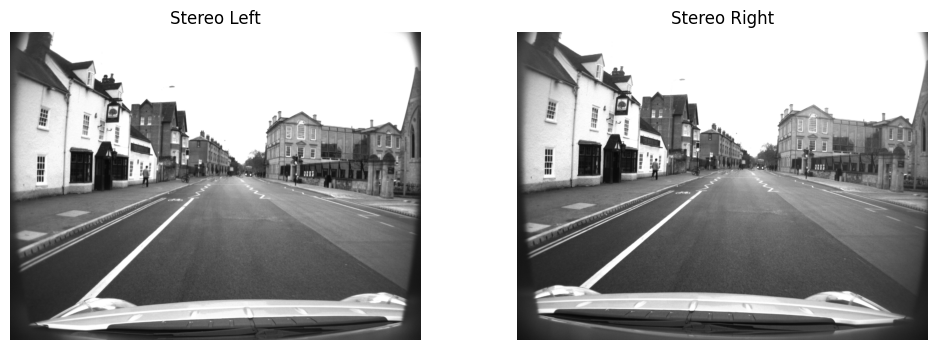

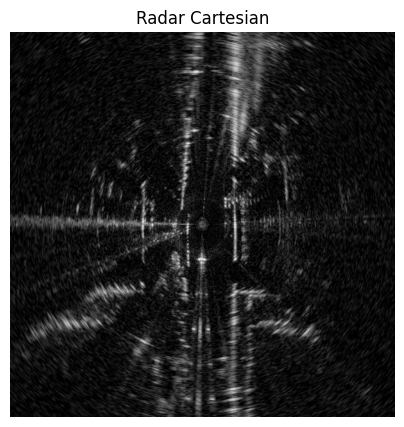

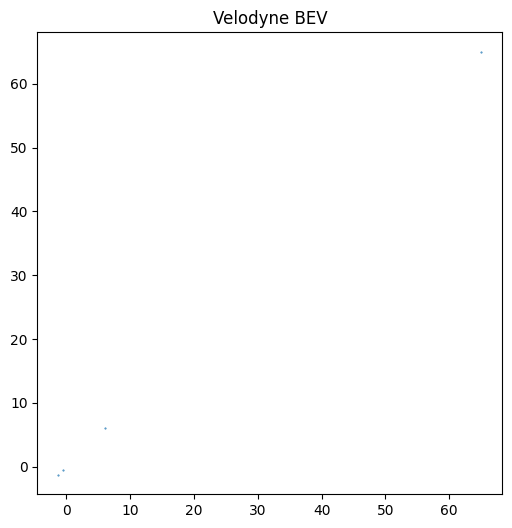

In [ ]:
DATA_ROOT = "/content/drive/MyDrive/AICV/OD/robotcar_large_sample/2019-01-10-14-36-48-radar-oxford-10k-partial"

ts0 = load_timestamps(os.path.join(DATA_ROOT, "radar.timestamps"))[0]
frame = get_frame(DATA_ROOT, ts0)
visualize_frame(frame)

#### YOLOv8 (Ultralytics) 설치 + 기본 모델 로드

In [ ]:
!pip -q install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.4 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

det_model = YOLO("yolov8s.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


#### 탐지 함수 (bbox/score/class 반환)

In [ ]:
import numpy as np

# COCO 클래스 이름(ultralytics 기본에 포함)
COCO_NAMES = det_model.names

def detect_objects(frame, conf=0.25, iou=0.45, max_det=50, use_img="left"):
    """
    use_img: "left" or "right" (stereo) / 필요시 mono로 바꾸려면 frame 키만 바꾸면 됨
    returns: list of dict {xyxy, conf, cls_id, cls_name}
    """
    img = frame["left_img"] if use_img == "left" else frame["right_img"]
    # Ultralytics는 RGB numpy array OK
    results = det_model.predict(img, conf=conf, iou=iou, max_det=max_det, verbose=False)

    dets = []
    r0 = results[0]
    if r0.boxes is None or len(r0.boxes) == 0:
        return dets

    boxes = r0.boxes
    for b in boxes:
        xyxy = b.xyxy[0].cpu().numpy().astype(float)  # (x1,y1,x2,y2)
        score = float(b.conf[0].cpu().numpy())
        cls_id = int(b.cls[0].cpu().numpy())
        cls_name = COCO_NAMES.get(cls_id, str(cls_id))

        dets.append({
            "xyxy": xyxy,
            "conf": score,
            "cls_id": cls_id,
            "cls_name": cls_name
        })
    return dets

#### 박스 시각화

In [ ]:
import cv2

def draw_detections_rgb(img_rgb, dets, min_conf=0.25, show_label=True):
    """
    img_rgb: RGB numpy
    returns: annotated RGB numpy
    """
    img = img_rgb.copy()
    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    for d in dets:
        if d["conf"] < min_conf:
            continue
        x1, y1, x2, y2 = d["xyxy"]
        x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
        cv2.rectangle(img_bgr, (x1, y1), (x2, y2), (0, 255, 0), 2)

        if show_label:
            label = f'{d["cls_name"]} {d["conf"]:.2f}'
            cv2.putText(img_bgr, label, (x1, max(0, y1 - 8)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    return cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

#### 실행: get_frame → detect → visualize

#### 클래스 필터링 (보행자/차량 위주)

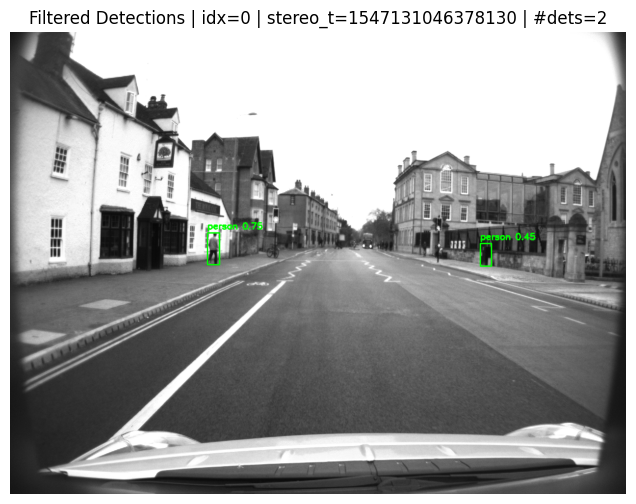

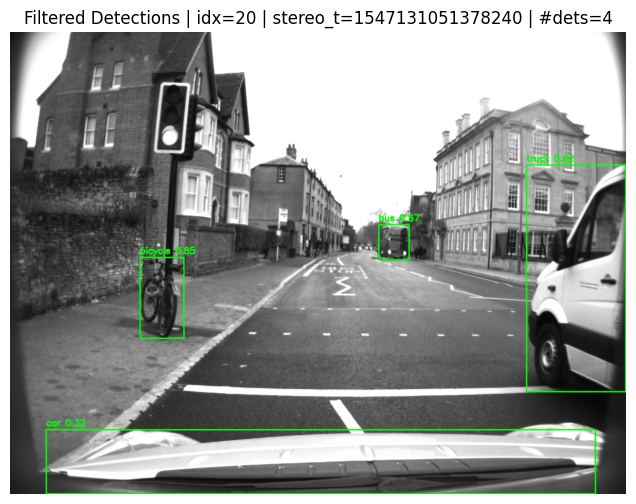

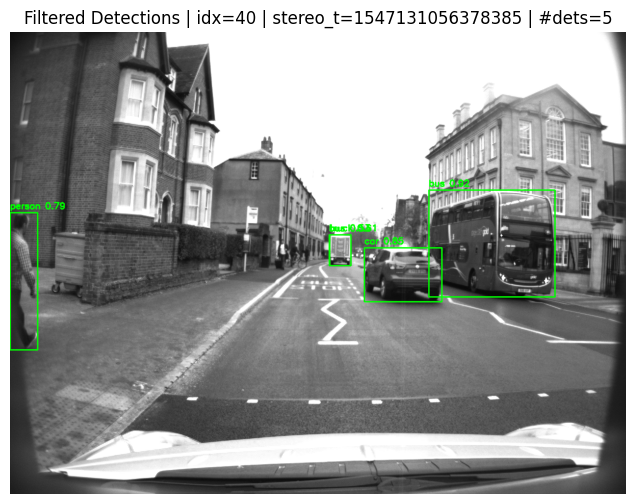

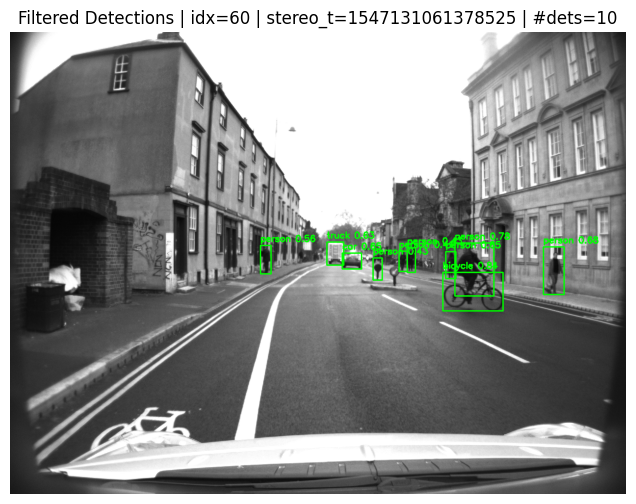

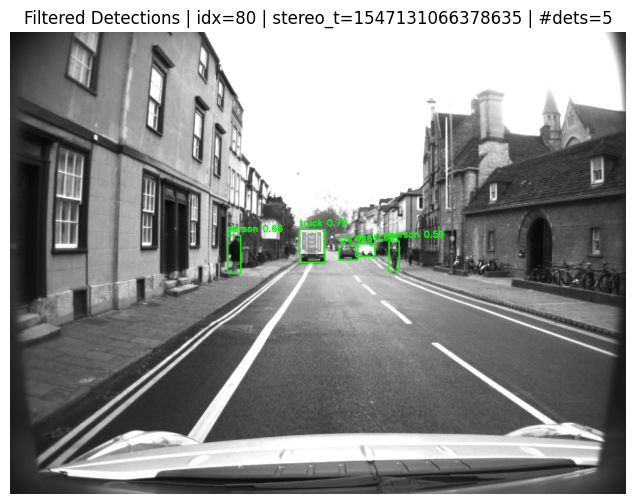

In [ ]:
import os
import matplotlib.pyplot as plt

DATA_ROOT = "/content/drive/MyDrive/AICV/OD/robotcar_large_sample/2019-01-10-14-36-48-radar-oxford-10k-partial"

radar_ts = load_timestamps(os.path.join(DATA_ROOT, "radar.timestamps"))

TARGET_CLASSES = {"person", "car", "bus", "truck", "motorcycle", "bicycle"}

def filter_dets(dets, target=TARGET_CLASSES, min_conf=0.30):
    return [d for d in dets if d["cls_name"] in target and d["conf"] >= min_conf]

indices = [0, 20, 40, 60, 80]

for idx in indices:
    t = int(radar_ts[idx])
    frame = get_frame(DATA_ROOT, t)

    dets = detect_objects(frame, conf=0.25, iou=0.45, max_det=50, use_img="left")
    dets_f = filter_dets(dets, min_conf=0.30)

    vis = draw_detections_rgb(frame["left_img"], dets_f, min_conf=0.30)

    plt.figure(figsize=(12,6))
    plt.imshow(vis)
    plt.title(
        f"Filtered Detections | idx={idx} | stereo_t={frame['t_stereo']} | #dets={len(dets_f)}"
    )
    plt.axis("off")
    plt.show()

In [ ]:
# import os
# import random
# import matplotlib.pyplot as plt

# DATA_ROOT = "/content/drive/MyDrive/Colab Notebooks/Self-Driving-Car/robotcar_large_sample"
# radar_ts = load_timestamps(os.path.join(DATA_ROOT, "radar.timestamps"))

# # 랜덤으로 5개 timestamp 선택
# sample_ts = random.sample(list(radar_ts), 5)

# for t in sample_ts:
#     frame = get_frame(DATA_ROOT, int(t))

#     dets = detect_objects(frame, conf=0.25, iou=0.45, max_det=50, use_img="left")
#     dets_f = filter_dets(dets, min_conf=0.30)

#     vis = draw_detections_rgb(frame["left_img"], dets_f, min_conf=0.30)

#     plt.figure(figsize=(12,6))
#     plt.imshow(vis)
#     plt.title(
#         f"Random frame | t_stereo={frame['t_stereo']} | #dets={len(dets_f)}"
#     )
#     plt.axis("off")
#     plt.show()

In [ ]:
# import random
# import os
# import matplotlib.pyplot as plt

# DATA_ROOT = "/content/drive/MyDrive/Colab Notebooks/Self-Driving-Car/robotcar_large_sample"

# radar_ts = load_timestamps(os.path.join(DATA_ROOT, "radar.timestamps"))

# TARGET_CLASSES = {"person", "car", "bus", "truck", "motorcycle", "bicycle"}

# def filter_dets(dets, target=TARGET_CLASSES, min_conf=0.30):
#     return [d for d in dets if d["cls_name"] in target and d["conf"] >= min_conf]

# # 랜덤으로 5개 선택
# sample_ts = random.sample(list(radar_ts), 5)

# for t in sample_ts:
#     frame = get_frame(DATA_ROOT, int(t))

#     dets = detect_objects(frame, conf=0.25, iou=0.45, max_det=50, use_img="left")
#     dets_f = filter_dets(dets, min_conf=0.30)

#     vis = draw_detections_rgb(frame["left_img"], dets_f, min_conf=0.30)

#     plt.figure(figsize=(12,6))
#     plt.imshow(vis)
#     plt.title(
#         f"Filtered Detections | stereo_t={frame['t_stereo']} | #dets={len(dets_f)}"
#     )
#     plt.axis("off")
#     plt.show()

#### 거리 추정 출력 포맷

In [ ]:
def dets_to_records(dets):
    records = []
    for d in dets:
        x1, y1, x2, y2 = d["xyxy"]
        records.append({
            "cls": d["cls_name"],
            "conf": d["conf"],
            "x1": float(x1), "y1": float(y1), "x2": float(x2), "y2": float(y2),

            # 다음 단계에서 채울 값들 (지금은 None)
            "stereo_dist_m": None,
            "radar_dist_m": None
        })
    return records

records = dets_to_records(dets_f)
records[:3]


[{'cls': 'truck',
  'conf': 0.7898366451263428,
  'x1': 601.64501953125,
  'y1': 410.4102783203125,
  'x2': 654.32421875,
  'y2': 478.80224609375,
  'stereo_dist_m': None,
  'radar_dist_m': None},
 {'cls': 'person',
  'conf': 0.6647405028343201,
  'x1': 452.9315185546875,
  'y1': 422.1434326171875,
  'x2': 479.7017822265625,
  'y2': 501.0172119140625,
  'stereo_dist_m': None,
  'radar_dist_m': None},
 {'cls': 'car',
  'conf': 0.614453911781311,
  'x1': 718.4942626953125,
  'y1': 440.1643981933594,
  'x2': 758.5125732421875,
  'y2': 466.1904602050781,
  'stereo_dist_m': None,
  'radar_dist_m': None}]

#### Stereo 매칭(Disparity) 계산

In [ ]:
import numpy as np
import cv2

def compute_disparity_sgbm(left_rgb, right_rgb):
    """
    left_rgb/right_rgb: RGB (H,W,3)
    returns: disparity float32 (pixel)  (H,W)  / invalid는 0 이하일 수 있음
    """
    left_gray  = cv2.cvtColor(left_rgb, cv2.COLOR_RGB2GRAY)
    right_gray = cv2.cvtColor(right_rgb, cv2.COLOR_RGB2GRAY)

    # SGBM 파라미터
    # numDisparities는 16의 배수
    min_disp = 0
    num_disp = 16 * 10  # 160
    block_size = 5

    matcher = cv2.StereoSGBM_create(
        minDisparity=min_disp,
        numDisparities=num_disp,
        blockSize=block_size,
        P1=8 * 1 * block_size * block_size,
        P2=32 * 1 * block_size * block_size,
        disp12MaxDiff=1,
        uniquenessRatio=10,
        speckleWindowSize=100,
        speckleRange=32,
        preFilterCap=63,
        mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
    )

    disp = matcher.compute(left_gray, right_gray).astype(np.float32) / 16.0
    return disp

#### (1) 로드 → (2) demosaic → (3) undistort → (4) disparity(SGBM) → (5) depth(m)

In [ ]:
import os, sys
import cv2
import numpy as np

# ====== PATH ======
DATA_ROOT   = "/content/drive/MyDrive/AICV/OD/robotcar_large_sample/2019-01-10-14-36-48-radar-oxford-10k-partial"
SDK_PY      = "/content/robotcar-dataset-sdk/python"
MODELS_DIR  = "/content/robotcar-dataset-sdk/models"

if SDK_PY not in sys.path:
    sys.path.insert(0, SDK_PY)

import camera_model

# ====== RobotCar: Bumblebee XB3 wide-baseline (left+right) ======
BASELINE_M = 0.24  # wide baseline = 24cm (left+right)  :contentReference[oaicite:5]{index=5}

def load_bayer_png_as_rgb(path):
    """
    RobotCar Bumblebee XB3: raw Bayer PNG, pattern=GBRG  :contentReference[oaicite:6]{index=6}
    """
    img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    if img is None:
        raise FileNotFoundError(path)

    # 16-bit면 8-bit로 다운스케일(대략)
    if img.dtype == np.uint16:
        img = (img / 256).astype(np.uint8)

    # Bayer (1채널)
    if img.ndim == 2:
        rgb = cv2.cvtColor(img, cv2.COLOR_BayerGB2RGB)  # GBRG
        return rgb

    # 이미 3채널이면(BGR)
    if img.ndim == 3 and img.shape[2] == 3:
        return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    raise ValueError(f"Unsupported image shape: {img.shape}, dtype={img.dtype}")

def read_first_stereo_timestamp():
    ts_path = os.path.join(DATA_ROOT, "stereo.timestamps")
    with open(ts_path, "r") as f:
        t = f.readline().split()[0]
    return t

def build_camera_models():
    # signature: (models_dir, images_dir) 라고 하셨으니 그대로 사용
    model_left  = camera_model.CameraModel(MODELS_DIR, os.path.join(DATA_ROOT, "stereo/left"))
    model_right = camera_model.CameraModel(MODELS_DIR, os.path.join(DATA_ROOT, "stereo/right"))
    return model_left, model_right

def compute_disparity_sgbm(left_rgb, right_rgb):
    left_gray  = cv2.cvtColor(left_rgb,  cv2.COLOR_RGB2GRAY)
    right_gray = cv2.cvtColor(right_rgb, cv2.COLOR_RGB2GRAY)

    # SGBM 기본 세팅(나중에 튜닝 가능)
    min_disp = 0
    num_disp = 16 * 10  # 160 (16의 배수)
    block    = 5

    sgbm = cv2.StereoSGBM_create(
        minDisparity=min_disp,
        numDisparities=num_disp,
        blockSize=block,
        P1=8 * block * block,
        P2=32 * block * block,
        disp12MaxDiff=1,
        uniquenessRatio=10,
        speckleWindowSize=100,
        speckleRange=32,
        preFilterCap=63,
        mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
    )

    disp = sgbm.compute(left_gray, right_gray).astype(np.float32) / 16.0
    return disp

def disparity_to_depth(disp, fx_px, baseline_m):
    depth = np.full_like(disp, np.nan, dtype=np.float32)
    valid = disp > 1.0
    depth[valid] = (fx_px * baseline_m) / disp[valid]
    return depth

# ====== RUN 1 FRAME ======
t = read_first_stereo_timestamp()
left_path  = os.path.join(DATA_ROOT, "stereo/left",  f"{t}.png")
right_path = os.path.join(DATA_ROOT, "stereo/right", f"{t}.png")

left_rgb  = load_bayer_png_as_rgb(left_path)
right_rgb = load_bayer_png_as_rgb(right_path)

model_left, model_right = build_camera_models()

# undistort
left_u  = model_left.undistort(left_rgb)
right_u = model_right.undistort(right_rgb)

# fx from CameraModel
fx = float(model_left.focal_length[0])  # (fx,fy) in pixels :contentReference[oaicite:7]{index=7}

disp  = compute_disparity_sgbm(left_u, right_u)
depth = disparity_to_depth(disp, fx, BASELINE_M)

print("timestamp:", t)
print("fx(px):", fx, "baseline(m):", BASELINE_M)
print("disp stats:", np.nanmin(disp), np.nanmax(disp))
print("depth stats (m):", np.nanmin(depth), np.nanmax(depth))


timestamp: 1547131046315627
fx(px): 983.044006 baseline(m): 0.24
disp stats: -1.0 159.0
depth stats (m): 1.48384 222.05229


#### bbox별 거리 추정 함수

In [ ]:
import numpy as np

def bbox_depth_robust(depth_m, xyxy, inner=0.15, min_valid=50, clip_percent=(5, 95)):
    """
    depth_m: (H,W) float, invalid=nan
    xyxy: (x1,y1,x2,y2)
    inner: bbox 테두리 영향 줄이기 위해 안쪽 영역만 사용 (0.15~0.25 추천)
    min_valid: 유효 depth 픽셀 최소 개수
    clip_percent: depth 분포의 하위/상위 퍼센트 클리핑(이상치 제거)
    return: float distance(m) or None
    """
    h, w = depth_m.shape[:2]
    x1, y1, x2, y2 = map(float, xyxy)

    bw = x2 - x1
    bh = y2 - y1
    x1 = x1 + bw * inner
    x2 = x2 - bw * inner
    y1 = y1 + bh * inner
    y2 = y2 - bh * inner

    x1 = int(np.clip(x1, 0, w-1))
    x2 = int(np.clip(x2, 0, w))
    y1 = int(np.clip(y1, 0, h-1))
    y2 = int(np.clip(y2, 0, h))

    if x2 <= x1 or y2 <= y1:
        return None

    roi = depth_m[y1:y2, x1:x2]
    vals = roi[np.isfinite(roi)]
    if vals.size < min_valid:
        return None

    lo, hi = np.percentile(vals, clip_percent)
    vals = vals[(vals >= lo) & (vals <= hi)]
    if vals.size < max(10, min_valid // 3):
        return None

    return float(np.median(vals))

#### 탐지 결과(dets)에 stereo 거리 붙이기

In [ ]:
def attach_radar_range_to_dets(dets, radar_polar, fx, cx,
                               stereo_ok_min=3.0, stereo_ok_max=120.0,
                               guided_window_m=20.0):
    out = []
    for d in dets:
        bearing = bbox_to_bearing_rad(d["xyxy"], fx, cx)
        s = d.get("stereo_dist_m", None)

        use_guided = (s is not None) and (stereo_ok_min <= s <= stereo_ok_max)

        if use_guided:
            r = radar_range_from_bearing(
                radar_polar, bearing,
                min_m=4.0, max_m=80.0,
                smooth_k=11, thr_quantile=0.98,  # guided에서도 조금 완화
                stereo_hint_m=s, window_m=guided_window_m
            )
        else:
            # stereo 힌트가 없거나 비정상이면 unguided로 매칭 늘리기
            r = radar_range_from_bearing(
                radar_polar, bearing,
                min_m=4.0, max_m=80.0,
                smooth_k=11, thr_quantile=0.98,
                stereo_hint_m=None
            )

        dd = dict(d)
        dd["bearing_rad"] = bearing
        dd["radar_dist_m"] = r
        out.append(dd)
    return out

#### 시각화: bbox + class + conf + stereo distance(m)

In [ ]:
import cv2

def draw_dets_with_stereo_dist(img_rgb, dets, min_conf=0.30):
    img = img_rgb.copy()
    bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    for d in dets:
        if d.get("conf", 1.0) < min_conf:
            continue

        x1, y1, x2, y2 = map(int, d["xyxy"])
        cv2.rectangle(bgr, (x1, y1), (x2, y2), (0,255,0), 2)

        dist = d.get("stereo_dist_m", None)
        if dist is None:
            label = f'{d["cls_name"]} {d["conf"]:.2f} | dist: N/A'
        else:
            label = f'{d["cls_name"]} {d["conf"]:.2f} | {dist:.1f}m'

        cv2.putText(bgr, label, (x1, max(0, y1-8)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)

    return cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

#### get_frame → undistort → depth → detect → 거리 추정 → 오버레이

In [ ]:
import numpy as np

def bbox_depth_robust(depth_m, xyxy, inner=0.15, min_valid=20, clip_percent=(5, 95)):
    """
    depth_m: (H,W) float32 depth in meters (invalid: 0, inf, nan 가능)
    xyxy: [x1,y1,x2,y2]
    inner: bbox 내부에서 테두리 제외 비율 (0.15면 15%씩 안쪽)
    min_valid: 유효 픽셀 최소 개수
    clip_percent: outlier 제거용 분위수 (5~95)
    """
    H, W = depth_m.shape[:2]
    x1, y1, x2, y2 = map(float, xyxy)

    x1 = int(max(0, min(W-1, x1)))
    x2 = int(max(0, min(W-1, x2)))
    y1 = int(max(0, min(H-1, y1)))
    y2 = int(max(0, min(H-1, y2)))

    if x2 <= x1 or y2 <= y1:
        return None

    bw = x2 - x1
    bh = y2 - y1

    ix1 = int(x1 + bw * inner)
    ix2 = int(x2 - bw * inner)
    iy1 = int(y1 + bh * inner)
    iy2 = int(y2 - bh * inner)

    ix1 = max(x1, min(W-1, ix1))
    ix2 = max(x1+1, min(W, ix2))
    iy1 = max(y1, min(H-1, iy1))
    iy2 = max(y1+1, min(H, iy2))

    patch = depth_m[iy1:iy2, ix1:ix2].astype(np.float32)
    if patch.size == 0:
        return None

    # 유효 depth만
    valid = patch[np.isfinite(patch) & (patch > 0)]
    if valid.size < min_valid:
        return None

    lo, hi = np.percentile(valid, clip_percent)
    valid2 = valid[(valid >= lo) & (valid <= hi)]
    if valid2.size < min_valid:
        return None

    return float(np.median(valid2))


def attach_stereo_range_to_dets(dets, depth_m, min_valid_m=2.0, max_valid_m=120.0):
    """
    dets(list[dict])에 stereo_dist_m를 붙여 반환
    - depth가 비정상(너무 작거나 너무 크면) None 처리
    """
    out = []
    for d in dets:
        dist = bbox_depth_robust(depth_m, d["xyxy"], inner=0.15, min_valid=20, clip_percent=(5,95))
        if dist is not None:
            if not (min_valid_m <= dist <= max_valid_m):
                dist = None
        dd = dict(d)
        dd["stereo_dist_m"] = dist
        out.append(dd)
    return out

#### 레이더 원본 가져오기

In [ ]:
import numpy as np
import os

def load_radar_polar(DATA_ROOT, t_radar):
    radar_png = os.path.join(DATA_ROOT, "radar", f"{t_radar}.png")
    timestamps, azimuths, valid, fft_data, radar_res = radar.load_radar(radar_png)

    # radar_res 스칼라 확정
    radar_res = float(np.array(radar_res).squeeze())

    # 표준화: azimuths -> (N,), fft -> (N, R)
    azimuths = np.array(azimuths).squeeze()     # (400,1) -> (400,)
    fft = np.array(fft_data).squeeze()          # (400,3768,1) -> (400,3768)

    # 안전 확인
    if azimuths.ndim != 1:
        raise ValueError(f"azimuths should be 1D after squeeze, got {azimuths.shape}")
    if fft.ndim != 2:
        raise ValueError(f"fft should be 2D after squeeze, got {fft.shape}")

    return {
        "radar_png": radar_png,
        "azimuths": azimuths.astype(np.float32),   # (N,)
        "valid": np.array(valid).squeeze() if valid is not None else None,
        "fft": fft.astype(np.float32),             # (N,R)
        "radar_res": radar_res
    }

#### 카메라 bbox → bearing 추정

In [ ]:
def get_fx_and_cx(model_left, img_w):
    # fx는 확정
    fx = float(model_left.focal_length[0])

    # cx는 모델 속성명이 SDK 버전에 따라 다를 수 있어요.
    # 없으면 이미지 중심으로 추정.
    cx = None
    for cand in ["principal_point", "center", "c", "pp"]:
        if hasattr(model_left, cand):
            v = getattr(model_left, cand)
            # principal_point가 (cx,cy) 형태인 경우가 흔함
            try:
                cx = float(v[0])
                break
            except Exception:
                pass

    if cx is None:
        cx = img_w / 2.0  # 추정

    return fx, cx

def bbox_to_bearing_rad(xyxy, fx, cx):
    x1, y1, x2, y2 = map(float, xyxy)
    u = (x1 + x2) / 2.0
    # pinhole 근사: theta = arctan((u - cx)/fx)
    return float(np.arctan2((u - cx), fx))

#### bearing → 레이더에서 거리 peak 뽑기

In [ ]:
import numpy as np

def smooth_1d(x, k=11):
    x = np.asarray(x, dtype=np.float32).reshape(-1)
    if k <= 1:
        return x
    k = int(k) if int(k) % 2 == 1 else int(k) + 1
    pad = k // 2
    xp = np.pad(x, (pad, pad), mode="edge")
    kernel = np.ones(k, dtype=np.float32) / k
    return np.convolve(xp, kernel, mode="valid")


def _radar_peak_in_window(prof_full, radar_res, lo_m, hi_m, smooth_k, thr_quantile):
    r0 = int(max(0, lo_m / radar_res))
    r1 = int(min(len(prof_full), hi_m / radar_res))
    prof = prof_full[r0:r1]
    if prof.size < 10:
        return None

    prof_s = smooth_1d(prof, k=smooth_k)
    thr = float(np.quantile(prof_s, thr_quantile))
    mask = prof_s >= thr
    if not np.any(mask):
        return None

    first = int(np.argmax(mask))
    return float((r0 + first) * radar_res)


def radar_range_from_bearing(
    radar_polar,
    bearing_rad,
    # 기본 unguided 범위
    min_m=4.0,
    max_m=80.0,
    smooth_k=11,
    thr_quantile=0.99,

    # stereo guided 옵션
    stereo_hint_m=None,
    window_m=20.0,
    guided_thr_quantile=0.98
):
    azimuths = radar_polar["azimuths"]
    fft = radar_polar["fft"]
    radar_res = radar_polar["radar_res"]
    valid = radar_polar["valid"]

    # 가장 가까운 azimuth index
    diff = np.angle(np.exp(1j * (azimuths - bearing_rad)))
    idx = int(np.argmin(np.abs(diff)))

    # invalid azimuth면 주변 valid 대체
    if valid is not None and len(valid) == len(azimuths) and (not bool(valid[idx])):
        for d in [1,2,3,4,5]:
            for j in [idx-d, idx+d]:
                if 0 <= j < len(valid) and bool(valid[j]):
                    idx = j
                    break

    prof_full = np.asarray(fft[idx], dtype=np.float32).reshape(-1)  # (R,)

    # 1) stereo guided 시도
    if stereo_hint_m is not None and np.isfinite(stereo_hint_m):
        lo = max(min_m, float(stereo_hint_m) - float(window_m))
        hi = min(max_m, float(stereo_hint_m) + float(window_m))
        if hi > lo:
            d1 = _radar_peak_in_window(
                prof_full, radar_res, lo, hi,
                smooth_k=smooth_k,
                thr_quantile=guided_thr_quantile
            )
            if d1 is not None:
                return d1

    # 2) guided 실패 or stereo 없음 → unguided fallback
    return _radar_peak_in_window(
        prof_full, radar_res, min_m, max_m,
        smooth_k=smooth_k,
        thr_quantile=thr_quantile
    )

#### dets에 radar 거리 붙이고 stereo와 비교

In [ ]:
def attach_radar_range_to_dets(dets, radar_polar, fx, cx):
    out = []
    for d in dets:
        bearing = bbox_to_bearing_rad(d["xyxy"], fx, cx)

        s = d.get("stereo_dist_m", None)  # stereo 힌트
        r = radar_range_from_bearing(
            radar_polar, bearing,
            stereo_hint_m=s,
            window_m=15.0,     # 필요하면 10~25로 조절
        )

        dd = dict(d)
        dd["bearing_rad"] = bearing
        dd["radar_dist_m"] = r
        out.append(dd)
    return out


def compare_stereo_radar(dets):
    rows = []
    for d in dets:
        s = d.get("stereo_dist_m", None)
        r = d.get("radar_dist_m", None)
        if s is None or r is None:
            err = None
        else:
            err = float(abs(s - r))
        rows.append({
            "cls": d.get("cls_name"),
            "conf": d.get("conf"),
            "stereo_m": s,
            "radar_m": r,
            "abs_err_m": err
        })
    return rows

#### stereo+radar 거리 오버레이

In [ ]:
def attach_stereo_range_to_dets(dets, depth_m, min_valid_m=2.0, max_valid_m=120.0):
    out = []
    for d in dets:
        dist = bbox_depth_robust(depth_m, d["xyxy"], inner=0.15, min_valid=50, clip_percent=(5,95))
        if dist is not None:
            if not (min_valid_m <= dist <= max_valid_m):
                dist = None  # 비정상 값 제거
        dd = dict(d)
        dd["stereo_dist_m"] = dist
        out.append(dd)
    return out

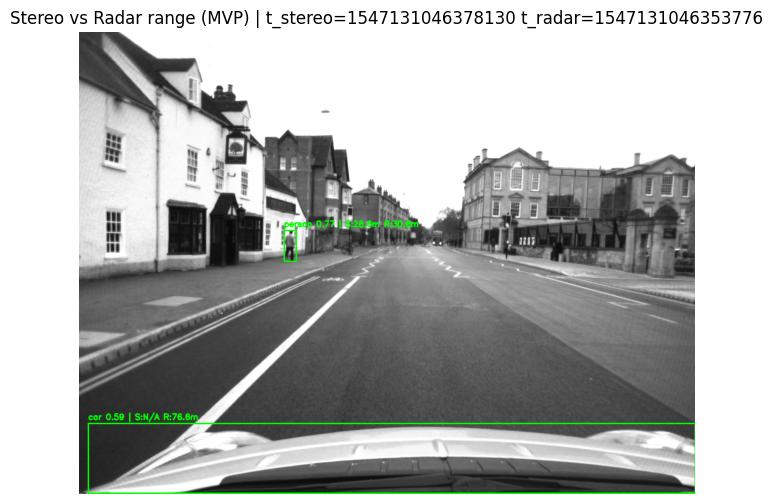

Rows with both stereo & radar: 1


[{'cls': 'person',
  'conf': 0.770298957824707,
  'stereo_m': 28.59764289855957,
  'radar_m': 30.844800800085068,
  'abs_err_m': 2.2471579015254974}]

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

def draw_dets_with_stereo_radar(img_rgb, dets, min_conf=0.30):
    img = img_rgb.copy()
    bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    for d in dets:
        if d.get("conf", 1.0) < min_conf:
            continue
        x1, y1, x2, y2 = map(int, d["xyxy"])

        s = d.get("stereo_dist_m", None)
        r = d.get("radar_dist_m", None)

        cv2.rectangle(bgr, (x1,y1), (x2,y2), (0,255,0), 2)

        s_txt = "N/A" if s is None else f"{s:.1f}m"
        r_txt = "N/A" if r is None else f"{r:.1f}m"
        label = f'{d["cls_name"]} {d["conf"]:.2f} | S:{s_txt} R:{r_txt}'

        cv2.putText(bgr, label, (x1, max(0, y1-8)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.55, (0,255,0), 2)

    return cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

# ====== 1) 프레임 로드 ======
t0 = load_timestamps(os.path.join(DATA_ROOT, "radar.timestamps"))[0]
frame = get_frame(DATA_ROOT, int(t0))

# ====== 2) stereo undistort + depth (03 결과 재사용) ======
left_rgb  = frame["left_img"]
right_rgb = frame["right_img"]
left_u  = model_left.undistort(left_rgb)
right_u = model_right.undistort(right_rgb)

disp  = compute_disparity_sgbm(left_u, right_u)
depth = disparity_to_depth(disp, fx, BASELINE_M)

# ====== 3) detect (02 결과 재사용) ======
dets = detect_objects({"left_img": left_u, "right_img": right_u}, conf=0.25, iou=0.45, max_det=50, use_img="left")
try:
    dets = filter_dets(dets, min_conf=0.30)
except Exception:
    dets = [d for d in dets if d["conf"] >= 0.30]

# ====== 4) stereo 거리 붙이기 (03) ======
dets = attach_stereo_range_to_dets(dets, depth)

# ====== 5) radar polar 로드 + radar 거리 붙이기 (04) ======
radar_polar = load_radar_polar(DATA_ROOT, frame["t_radar"])

img_h, img_w = left_u.shape[:2]
fx_local, cx_local = get_fx_and_cx(model_left, img_w)

dets = attach_radar_range_to_dets(dets, radar_polar, fx_local, cx_local)

# ====== 6) 시각화 ======
vis = draw_dets_with_stereo_radar(left_u, dets, min_conf=0.30)
plt.figure(figsize=(12,6))
plt.imshow(vis)
plt.title(f"Stereo vs Radar range (MVP) | t_stereo={frame['t_stereo']} t_radar={frame['t_radar']}")
plt.axis("off")
plt.show()

# 비교표(상위 10개)
rows = compare_stereo_radar(dets)
rows_sorted = sorted([r for r in rows if r["abs_err_m"] is not None], key=lambda x: x["abs_err_m"])
print("Rows with both stereo & radar:", len(rows_sorted))
rows_sorted[:10]

#### 샘플 30프레임 평가

In [ ]:
import os, numpy as np

def sample_timestamps(ts_list, n=30):
    if len(ts_list) <= n:
        return ts_list
    idxs = np.linspace(0, len(ts_list)-1, n).astype(int)
    return [ts_list[i] for i in idxs]

def eval_on_frames(DATA_ROOT, n_frames=30, min_conf=0.30):
    radar_ts = load_timestamps(os.path.join(DATA_ROOT, "radar.timestamps"))
    radar_ts_s = sample_timestamps(radar_ts, n=n_frames)

    results = []
    for t0 in radar_ts_s:
        frame = get_frame(DATA_ROOT, int(t0))

        # stereo
        left_rgb  = frame["left_img"]
        right_rgb = frame["right_img"]
        left_u  = model_left.undistort(left_rgb)
        right_u = model_right.undistort(right_rgb)

        disp  = compute_disparity_sgbm(left_u, right_u)
        depth = disparity_to_depth(disp, fx, BASELINE_M)

        # detect
        dets = detect_objects({"left_img": left_u, "right_img": right_u},
                              conf=0.25, iou=0.45, max_det=50, use_img="left")
        dets = [d for d in dets if d.get("conf", 1.0) >= min_conf]

        # stereo dist
        dets = attach_stereo_range_to_dets(dets, depth)

        # radar dist
        radar_polar = load_radar_polar(DATA_ROOT, frame["t_radar"])
        img_h, img_w = left_u.shape[:2]
        fx_local, cx_local = get_fx_and_cx(model_left, img_w)
        dets = attach_radar_range_to_dets(dets, radar_polar, fx_local, cx_local)

        rows = compare_stereo_radar(dets)
        both = [r for r in rows if (r["stereo_m"] is not None and r["radar_m"] is not None)]

        # frame-level summary
        abs_errs = [r["abs_err_m"] for r in both if r["abs_err_m"] is not None]
        results.append({
            "t_radar": frame["t_radar"],
            "t_stereo": frame["t_stereo"],
            "n_det": len(dets),
            "n_both": len(both),
            "median_abs_err": float(np.median(abs_errs)) if abs_errs else None,
            "max_abs_err": float(np.max(abs_errs)) if abs_errs else None,
        })

    return results

res = eval_on_frames(DATA_ROOT, n_frames=30, min_conf=0.30)
res

[{'t_radar': 1547131046353776,
  't_stereo': 1547131046378130,
  'n_det': 2,
  'n_both': 1,
  'median_abs_err': 2.2471579015254974,
  'max_abs_err': 2.2471579015254974},
 {'t_radar': 1547131048348015,
  't_stereo': 1547131048378174,
  'n_det': 6,
  'n_both': 5,
  'median_abs_err': 2.5403329730033875,
  'max_abs_err': 7.1790947169065475},
 {'t_radar': 1547131050605600,
  't_stereo': 1547131050628232,
  'n_det': 6,
  'n_both': 5,
  'median_abs_err': 1.7870845198631287,
  'max_abs_err': 27.49922090768814},
 {'t_radar': 1547131052606390,
  't_stereo': 1547131052628277,
  'n_det': 5,
  'n_both': 2,
  'median_abs_err': 1.0731404796242714,
  'max_abs_err': 1.4402037411928177},
 {'t_radar': 1547131054845109,
  't_stereo': 1547131054815830,
  'n_det': 4,
  'n_both': 3,
  'median_abs_err': 3.7515809237957,
  'max_abs_err': 3.7515809237957},
 {'t_radar': 1547131057105415,
  't_stereo': 1547131057128391,
  'n_det': 5,
  'n_both': 4,
  'median_abs_err': 2.2736302465200424,
  'max_abs_err': 10.69729

#### 요약 통계 출력

In [ ]:
vals = [r for r in res if r["median_abs_err"] is not None]
print("Frames evaluated:", len(res))
print("Frames with >=1 matched object:", len(vals))

if vals:
    med = np.median([r["median_abs_err"] for r in vals])
    mx  = np.max([r["max_abs_err"] for r in vals])
    print("Median of frame-median abs error (m):", float(med))
    print("Max abs error observed (m):", float(mx))

# n_both 분포
nb = [r["n_both"] for r in res]
print("Avg n_both:", float(np.mean(nb)), "Min:", int(np.min(nb)), "Max:", int(np.max(nb)))


Frames evaluated: 30
Frames with >=1 matched object: 30
Median of frame-median abs error (m): 6.292104311287403
Max abs error observed (m): 112.43567848205566
Avg n_both: 5.433333333333334 Min: 1 Max: 10


#### 프레임별 상세 rows 저장 평가 함수

In [ ]:
import os, numpy as np

def eval_on_frames_verbose(DATA_ROOT, n_frames=30, min_conf=0.30):
    radar_ts = load_timestamps(os.path.join(DATA_ROOT, "radar.timestamps"))
    radar_ts_s = radar_ts if len(radar_ts) <= n_frames else [radar_ts[i] for i in np.linspace(0, len(radar_ts)-1, n_frames).astype(int)]

    frames = []
    all_rows = []  # 객체 단위 rows 누적

    for t0 in radar_ts_s:
        frame = get_frame(DATA_ROOT, int(t0))

        # stereo
        left_rgb  = frame["left_img"]
        right_rgb = frame["right_img"]
        left_u  = model_left.undistort(left_rgb)
        right_u = model_right.undistort(right_rgb)

        disp  = compute_disparity_sgbm(left_u, right_u)
        depth = disparity_to_depth(disp, fx, BASELINE_M)

        # detect
        dets = detect_objects({"left_img": left_u, "right_img": right_u},
                              conf=0.25, iou=0.45, max_det=50, use_img="left")
        dets = [d for d in dets if d.get("conf", 1.0) >= min_conf]

        # stereo dist
        dets = attach_stereo_range_to_dets(dets, depth)

        # radar dist
        radar_polar = load_radar_polar(DATA_ROOT, frame["t_radar"])
        img_h, img_w = left_u.shape[:2]
        fx_local, cx_local = get_fx_and_cx(model_left, img_w)
        dets = attach_radar_range_to_dets(dets, radar_polar, fx_local, cx_local)

        # rows (객체 단위)
        rows = compare_stereo_radar(dets)

        # frame summary
        both = [r for r in rows if (r["stereo_m"] is not None and r["radar_m"] is not None)]
        abs_errs = [r["abs_err_m"] for r in both if r["abs_err_m"] is not None]

        frame_rec = {
            "t_radar": frame["t_radar"],
            "t_stereo": frame["t_stereo"],
            "n_det": len(dets),
            "n_both": len(both),
            "median_abs_err": float(np.median(abs_errs)) if abs_errs else None,
            "max_abs_err": float(np.max(abs_errs)) if abs_errs else None,
            "left_u": left_u,    # 실패 프레임 저장용
            "dets": dets,        # 실패 프레임 저장용
        }
        frames.append(frame_rec)

        # 객체 rows에 타임스탬프 붙여 누적
        for r in rows:
            rr = dict(r)
            rr["t_radar"] = frame["t_radar"]
            rr["t_stereo"] = frame["t_stereo"]
            all_rows.append(rr)

    return frames, all_rows

frames, all_rows = eval_on_frames_verbose(DATA_ROOT, n_frames=30, min_conf=0.30)
print("frames:", len(frames), "rows:", len(all_rows))

frames: 30 rows: 205


#### 오차 분포 그래프

Object-level matched count: 163
Object-level median abs err (m): 5.888155460357666
Object-level 90% abs err (m): 15.034276962280273
Object-level max abs err (m): 112.43567657470703
Frame-level median-of-median abs err (m): 6.292104244232178
Frame-level max abs err (m): 11.260741233825684


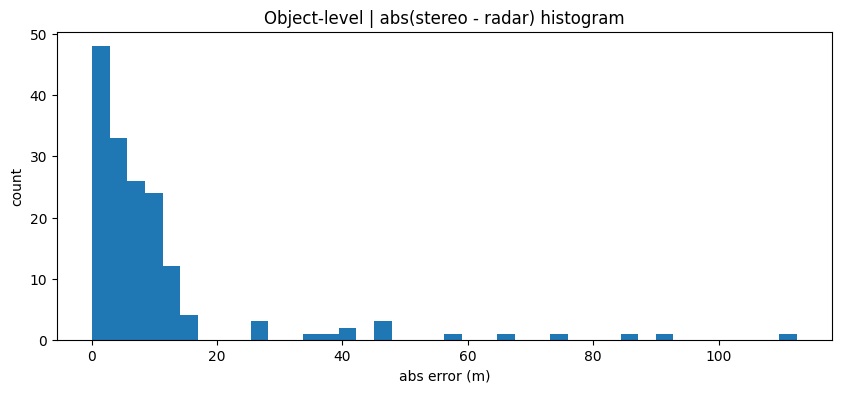

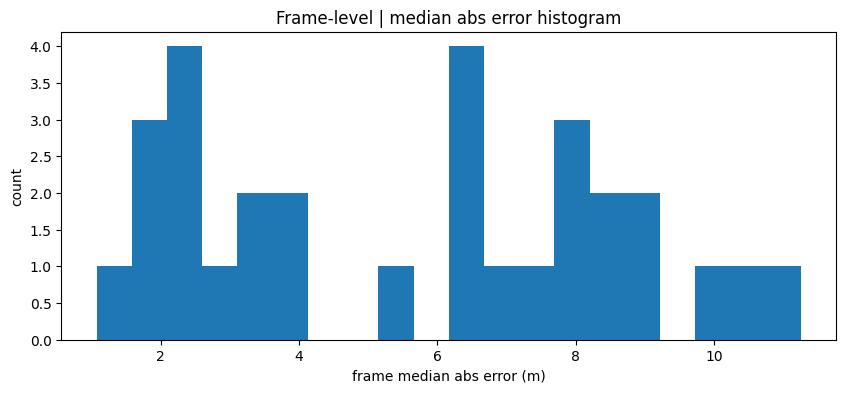


Class stats: (cls, n, median, mean, p90)
('traffic light', 5, 2.5114550590515137, 2.769749164581299, 5.621786117553711)
('bicycle', 10, 2.9937257766723633, 3.6758346557617188, 6.934406280517578)
('person', 42, 3.483724594116211, 4.3901801109313965, 9.46851921081543)
('bus', 7, 3.7515809535980225, 12.509323120117188, 31.47553825378418)
('truck', 15, 5.064157485961914, 15.649127006530762, 45.51887893676758)
('motorcycle', 1, 6.432730197906494, 6.432730197906494, 6.432730197906494)
('car', 83, 8.475184440612793, 13.69088077545166, 34.067771911621094)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# 객체 단위
obj_err = [r["abs_err_m"] for r in all_rows if r.get("abs_err_m") is not None]
obj_err = np.array(obj_err, dtype=np.float32)

# 프레임 단위
frm_med = [f["median_abs_err"] for f in frames if f["median_abs_err"] is not None]
frm_med = np.array(frm_med, dtype=np.float32)

print("Object-level matched count:", int(len(obj_err)))
print("Object-level median abs err (m):", float(np.median(obj_err)) if len(obj_err) else None)
print("Object-level 90% abs err (m):", float(np.quantile(obj_err, 0.9)) if len(obj_err) else None)
print("Object-level max abs err (m):", float(np.max(obj_err)) if len(obj_err) else None)

print("Frame-level median-of-median abs err (m):", float(np.median(frm_med)) if len(frm_med) else None)
print("Frame-level max abs err (m):", float(np.max(frm_med)) if len(frm_med) else None)

# (1) 객체 오차 히스토그램
plt.figure(figsize=(10,4))
plt.hist(obj_err, bins=40)
plt.title("Object-level | abs(stereo - radar) histogram")
plt.xlabel("abs error (m)")
plt.ylabel("count")
plt.show()

# (2) 프레임 median 오차 히스토그램
plt.figure(figsize=(10,4))
plt.hist(frm_med, bins=20)
plt.title("Frame-level | median abs error histogram")
plt.xlabel("frame median abs error (m)")
plt.ylabel("count")
plt.show()

# (3) 클래스별 평균/중앙 오차
by_cls = defaultdict(list)
for r in all_rows:
    if r.get("abs_err_m") is None:
        continue
    by_cls[r.get("cls","unknown")].append(r["abs_err_m"])

cls_stats = []
for c, v in by_cls.items():
    v = np.array(v, dtype=np.float32)
    cls_stats.append((c, len(v), float(np.median(v)), float(np.mean(v)), float(np.quantile(v, 0.9))))
cls_stats = sorted(cls_stats, key=lambda x: x[2])  # median 기준 정렬

print("\nClass stats: (cls, n, median, mean, p90)")
for row in cls_stats[:15]:
    print(row)

#### 위험 경고 일치율 계산

In [ ]:
def risk_confusion(all_rows, threshold_m=10.0):
    TP=FP=FN=TN=0
    for r in all_rows:
        s = r.get("stereo_m", None)
        d = r.get("radar_m", None)
        if s is None or d is None:
            continue
        s_risk = (s <= threshold_m)
        d_risk = (d <= threshold_m)
        if s_risk and d_risk: TP += 1
        elif (not s_risk) and d_risk: FP += 1
        elif s_risk and (not d_risk): FN += 1
        else: TN += 1

    total = TP+FP+FN+TN
    agree = (TP+TN)/total if total else None
    return {"thr_m": threshold_m, "TP":TP, "FP":FP, "FN":FN, "TN":TN, "agree":agree, "total":total}

for thr in [10.0, 5.0]:
    print(risk_confusion(all_rows, threshold_m=thr))

{'thr_m': 10.0, 'TP': 4, 'FP': 2, 'FN': 5, 'TN': 152, 'agree': 0.9570552147239264, 'total': 163}
{'thr_m': 5.0, 'TP': 1, 'FP': 0, 'FN': 3, 'TN': 159, 'agree': 0.9815950920245399, 'total': 163}


#### 최대오차 프레임 자동 저장

In [ ]:
import cv2, os

OUT_DIR = "/content/robotcar_outputs"
os.makedirs(OUT_DIR, exist_ok=True)

def draw_dets_with_stereo_radar(img_rgb, dets, min_conf=0.30):
    img = img_rgb.copy()
    bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    for d in dets:
        if d.get("conf", 1.0) < min_conf:
            continue
        x1, y1, x2, y2 = map(int, d["xyxy"])
        s = d.get("stereo_dist_m", None)
        r = d.get("radar_dist_m", None)
        cv2.rectangle(bgr, (x1,y1), (x2,y2), (0,255,0), 2)
        s_txt = "N/A" if s is None else f"{s:.1f}m"
        r_txt = "N/A" if r is None else f"{r:.1f}m"
        label = f'{d.get("cls_name","?")} {d.get("conf",0):.2f} | S:{s_txt} R:{r_txt}'
        cv2.putText(bgr, label, (x1, max(0, y1-8)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.55, (0,255,0), 2)
    return cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

# max_abs_err가 None인 프레임 제외, 큰 순으로 정렬
cand = [f for f in frames if f["max_abs_err"] is not None]
cand = sorted(cand, key=lambda x: x["max_abs_err"], reverse=True)

TOPK = 8
for i, f in enumerate(cand[:TOPK]):
    vis = draw_dets_with_stereo_radar(f["left_u"], f["dets"], min_conf=0.30)
    path = os.path.join(OUT_DIR, f"fail_{i:02d}_maxerr_{f['max_abs_err']:.1f}_tradar_{f['t_radar']}.png")
    cv2.imwrite(path, cv2.cvtColor(vis, cv2.COLOR_RGB2BGR))
    print("saved:", path)

saved: /content/robotcar_outputs/fail_00_maxerr_112.4_tradar_1547131072120019.png
saved: /content/robotcar_outputs/fail_01_maxerr_91.0_tradar_1547131089605826.png
saved: /content/robotcar_outputs/fail_02_maxerr_84.8_tradar_1547131070113363.png
saved: /content/robotcar_outputs/fail_03_maxerr_73.7_tradar_1547131093867389.png
saved: /content/robotcar_outputs/fail_04_maxerr_67.1_tradar_1547131065617731.png
saved: /content/robotcar_outputs/fail_05_maxerr_58.8_tradar_1547131061359050.png
saved: /content/robotcar_outputs/fail_06_maxerr_46.0_tradar_1547131085112861.png
saved: /content/robotcar_outputs/fail_07_maxerr_45.4_tradar_1547131074357792.png


#### risk level 판단

In [ ]:
def compute_risk_level(stereo_m, radar_m,
                       warn_m=20.0, danger_m=10.0):
    """
    stereo / radar 거리 기반 위험도 판단
    """
    dists = [d for d in [stereo_m, radar_m] if d is not None]
    if not dists:
        return "UNKNOWN", None

    eff = min(dists)  # 보수적 판단

    if eff <= danger_m:
        return "DANGER", eff
    elif eff <= warn_m:
        return "WARNING", eff
    else:
        return "SAFE", eff

#### 위험도 + 제어 신호 붙이기

In [ ]:
def attach_risk_and_control(dets):
    out = []
    for d in dets:
        risk, eff_dist = compute_risk_level(
            d.get("stereo_dist_m"),
            d.get("radar_dist_m")
        )

        # 제어 신호 (실차 대신 flag)
        control = {
            "brake": False,
            "slow_down": False
        }

        if risk == "DANGER":
            control["brake"] = True
        elif risk == "WARNING":
            control["slow_down"] = True

        dd = dict(d)
        dd["risk_level"] = risk
        dd["effective_dist_m"] = eff_dist
        dd["control"] = control
        out.append(dd)
    return out

#### 시각화: 위험도 색상

In [ ]:
def draw_dets_with_risk(img_rgb, dets, min_conf=0.30):
    img = img_rgb.copy()
    bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    COLORS = {
        "SAFE": (0, 255, 0),
        "WARNING": (0, 165, 255),
        "DANGER": (0, 0, 255),
        "UNKNOWN": (128, 128, 128)
    }

    for d in dets:
        if d.get("conf", 1.0) < min_conf:
            continue

        x1, y1, x2, y2 = map(int, d["xyxy"])
        risk = d.get("risk_level", "UNKNOWN")
        color = COLORS[risk]

        s = d.get("stereo_dist_m")
        r = d.get("radar_dist_m")
        eff = d.get("effective_dist_m")

        label = f'{risk}'
        if eff is not None:
            label += f' {eff:.1f}m'

        cv2.rectangle(bgr, (x1,y1), (x2,y2), color, 2)
        cv2.putText(bgr, label, (x1, max(0,y1-8)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

    return cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

#### 전체 파이프라인 + 제어 판단

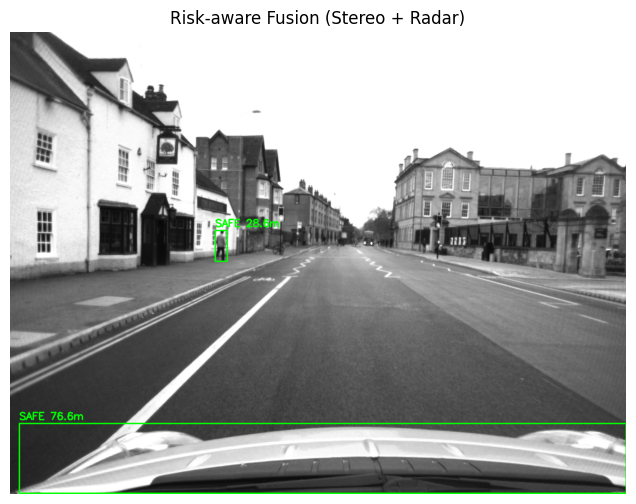

In [ ]:
# dets는 이미 stereo_dist / radar_dist 붙은 상태라고 가정
dets = attach_risk_and_control(dets)

vis = draw_dets_with_risk(left_u, dets)
plt.figure(figsize=(12,6))
plt.imshow(vis)
plt.title("Risk-aware Fusion (Stereo + Radar)")
plt.axis("off")
plt.show()

# 제어 신호 요약
for d in dets:
    if d["risk_level"] in ["WARNING", "DANGER"]:
        print({
            "cls": d["cls_name"],
            "risk": d["risk_level"],
            "effective_dist_m": d["effective_dist_m"],
            "control": d["control"]
        })

#### 이미지 목록 정렬

In [ ]:
import glob
import os

IMG_DIR = "/content/robotcar_outputs"
img_paths = sorted(glob.glob(os.path.join(IMG_DIR, "*.png")))

print("Number of frames:", len(img_paths))
print("First 5:")
for p in img_paths[:5]:
    print(os.path.basename(p))

Number of frames: 8
First 5:
fail_00_maxerr_112.4_tradar_1547131072120019.png
fail_01_maxerr_91.0_tradar_1547131089605826.png
fail_02_maxerr_84.8_tradar_1547131070113363.png
fail_03_maxerr_73.7_tradar_1547131093867389.png
fail_04_maxerr_67.1_tradar_1547131065617731.png


#### 영상으로 만들기 (mp4)

In [ ]:
import cv2

# 출력 비디오 설정
out_path = "/content/robotcar_risk_demo.mp4"
fps = 5  # 5~10 추천 (자율주행 느낌)
fourcc = cv2.VideoWriter_fourcc(*"mp4v")

# 첫 프레임으로 해상도 결정
first = cv2.imread(img_paths[0])
h, w, _ = first.shape

writer = cv2.VideoWriter(out_path, fourcc, fps, (w, h))

for p in img_paths:
    img = cv2.imread(p)
    if img is None:
        continue
    if img.shape[:2] != (h, w):
        img = cv2.resize(img, (w, h))
    writer.write(img)

writer.release()

print("Saved video:", out_path)

Saved video: /content/robotcar_risk_demo.mp4


#### 재생

In [ ]:
from IPython.display import Video

Video(out_path, embed=True)

In [ ]:
import os
out_path = "/content/robotcar_risk_demo.mp4"
print("exists:", os.path.exists(out_path))
print("size(bytes):", os.path.getsize(out_path) if os.path.exists(out_path) else None)

exists: True
size(bytes): 1913536


In [ ]:
import os, glob, shutil

IMG_DIR = "/content/robotcar_outputs"
tmp_dir = "/content/tmp_frames"
os.makedirs(tmp_dir, exist_ok=True)

img_paths = sorted(glob.glob(os.path.join(IMG_DIR, "*.png")))
print("frames:", len(img_paths))

# tmp_frames/frame_0000.png ... 로 복사
for i, p in enumerate(img_paths):
    dst = os.path.join(tmp_dir, f"frame_{i:04d}.png")
    shutil.copy(p, dst)

print("example:", os.path.join(tmp_dir, "frame_0000.png"))

frames: 8
example: /content/tmp_frames/frame_0000.png


In [ ]:
out_path = "/content/robotcar_risk_demo.mp4"
fps = 5

!ffmpeg -y -framerate {fps} -i /content/tmp_frames/frame_%04d.png \
  -c:v libx264 -pix_fmt yuv420p -movflags +faststart {out_path}

!ls -lh {out_path}

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
from IPython.display import Video
Video(out_path, embed=True)

#### 30프레임 전체 저장 + 영상 만들기

In [ ]:
import os, numpy as np, cv2
from tqdm import tqdm

OUT_FRAMES_DIR = "/content/robotcar_outputs/all_frames"
os.makedirs(OUT_FRAMES_DIR, exist_ok=True)

def sample_timestamps(ts_list, n=30):
    if len(ts_list) <= n:
        return ts_list
    idxs = np.linspace(0, len(ts_list)-1, n).astype(int)
    return [ts_list[i] for i in idxs]

# 1) 타임스탬프 샘플링 (radar 기준)
radar_ts = load_timestamps(os.path.join(DATA_ROOT, "radar.timestamps"))
radar_ts_s = sample_timestamps(radar_ts, n=30)

print("Saving frames:", len(radar_ts_s), "->", OUT_FRAMES_DIR)

for i, t0 in enumerate(tqdm(radar_ts_s)):
    frame = get_frame(DATA_ROOT, int(t0))

    # stereo undistort + depth
    left_rgb  = frame["left_img"]
    right_rgb = frame["right_img"]
    left_u  = model_left.undistort(left_rgb)
    right_u = model_right.undistort(right_rgb)

    disp  = compute_disparity_sgbm(left_u, right_u)
    depth = disparity_to_depth(disp, fx, BASELINE_M)

    # detection
    dets = detect_objects({"left_img": left_u, "right_img": right_u},
                          conf=0.25, iou=0.45, max_det=50, use_img="left")
    dets = [d for d in dets if d.get("conf", 1.0) >= 0.30]

    # attach stereo + radar
    dets = attach_stereo_range_to_dets(dets, depth)

    radar_polar = load_radar_polar(DATA_ROOT, frame["t_radar"])
    img_h, img_w = left_u.shape[:2]
    fx_local, cx_local = get_fx_and_cx(model_left, img_w)
    dets = attach_radar_range_to_dets(dets, radar_polar, fx_local, cx_local)

    # risk + visualization
    dets = attach_risk_and_control(dets)
    vis = draw_dets_with_risk(left_u, dets)

    # 프레임 상단에 타임스탬프 오버레이
    bgr = cv2.cvtColor(vis, cv2.COLOR_RGB2BGR)
    cv2.putText(bgr, f"idx={i:02d}  t_radar={frame['t_radar']}",
                (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,255,255), 2)

    save_path = os.path.join(OUT_FRAMES_DIR, f"frame_{i:04d}.png")
    cv2.imwrite(save_path, bgr)

print("Done. Example:", os.path.join(OUT_FRAMES_DIR, "frame_0000.png"))


Saving frames: 30 -> /content/robotcar_outputs/all_frames


 33%|███▎      | 10/30 [00:10<00:21,  1.09s/it]


KeyboardInterrupt: 

In [ ]:
out_path = "/content/robotcar_risk_demo_all30.mp4"
fps = 5  # 주행 느낌: 8~12, 분석 느낌: 4~6

!ffmpeg -y -framerate {fps} -i /content/robotcar_outputs/all_frames/frame_%04d.png \
  -c:v libx264 -pix_fmt yuv420p -movflags +faststart {out_path}

!ls -lh {out_path}

from IPython.display import Video
Video(out_path, embed=True)

In [ ]:
import os
import cv2
import numpy as np

def render_radar_panel(radar_cart, dets, fx, cx, cart_res=0.25, cart_pixel_width=600, min_conf=0.30):
    """
    radar_cart: radar.radar_polar_to_cartesian 결과 (H,W) float
    dets: stereo/radar 거리 붙은 detection list
    fx,cx: left camera intrinsics (bearing 계산용)
    반환: BGR 이미지 (H,W,3)
    """
    img = np.array(radar_cart, copy=True)

    if img.ndim != 2:
        img = img.squeeze()
    img = np.nan_to_num(img, nan=0.0, posinf=0.0, neginf=0.0)

    lo, hi = np.percentile(img, (5, 99))
    if hi <= lo:
        lo, hi = img.min(), img.max() + 1e-6
    img = np.clip((img - lo) / (hi - lo + 1e-6), 0, 1)
    img8 = (img * 255).astype(np.uint8)

    bgr = cv2.applyColorMap(img8, cv2.COLORMAP_TURBO)

    H, W = bgr.shape[:2]
    origin = (W // 2, H - 1)

    cv2.line(bgr, (origin[0], 0), (origin[0], H), (255,255,255), 1)
    cv2.line(bgr, (0, origin[1]), (W, origin[1]), (255,255,255), 1)

    for r_m in [10, 20, 30, 40, 50]:
        rad_px = int(r_m / cart_res)
        cv2.circle(bgr, origin, rad_px, (255,255,255), 1)

    for d in dets:
        if d.get("conf", 1.0) < min_conf:
            continue

        r = d.get("radar_dist_m", None)
        if r is None:
            continue

        bearing = bbox_to_bearing_rad(d["xyxy"], fx, cx)

        x_m = float(r) * np.sin(bearing)
        y_m = float(r) * np.cos(bearing)

        px = int(origin[0] + x_m / cart_res)
        py = int(origin[1] - y_m / cart_res)

        if 0 <= px < W and 0 <= py < H:
            cv2.circle(bgr, (px, py), 5, (0,0,255), -1)
            cv2.putText(bgr, f"{r:.1f}m", (px+6, py-6),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1)

    cv2.putText(bgr, "RADAR (cartesian)", (15, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,255,255), 2)

    return bgr


def make_stereo_radar_side_by_side_video(
    DATA_ROOT,
    out_path="/content/stereo_vs_radar.mp4",
    fps=10,
    max_frames=None,
    stride=1,
    cart_res=0.25,
    cart_pixel_width=600,
    conf=0.25,
    iou=0.45,
    min_conf_draw=0.30
):
    ts_stereo = load_timestamps(os.path.join(DATA_ROOT, "stereo.timestamps"))
    if max_frames is None:
        use_ts = ts_stereo[::stride]
    else:
        use_ts = ts_stereo[::stride][:max_frames]

    writer = None

    for k, t_query in enumerate(use_ts):
        frame = get_frame(DATA_ROOT, int(t_query), cart_res=cart_res, cart_pixel_width=cart_pixel_width)

        left_rgb  = frame["left_img"]
        right_rgb = frame["right_img"]

        left_u  = model_left.undistort(left_rgb)
        right_u = model_right.undistort(right_rgb)

        img_h, img_w = left_u.shape[:2]
        fx_local, cx_local = get_fx_and_cx(model_left, img_w)

        disp  = compute_disparity_sgbm(left_u, right_u)
        depth = disparity_to_depth(disp, fx_local, BASELINE_M)

        dets = detect_objects({"left_img": left_u, "right_img": right_u},
                              conf=conf, iou=iou, max_det=50, use_img="left")
        dets = [d for d in dets if d.get("conf", 1.0) >= min_conf_draw]

        dets = attach_stereo_range_to_dets(dets, depth)

        radar_polar = load_radar_polar(DATA_ROOT, frame["t_radar"])
        dets = attach_radar_range_to_dets(dets, radar_polar, fx_local, cx_local)

        left_vis_rgb = draw_dets_with_stereo_radar(left_u, dets, min_conf=min_conf_draw)
        left_vis_bgr = cv2.cvtColor(left_vis_rgb, cv2.COLOR_RGB2BGR)

        radar_panel_bgr = render_radar_panel(frame["radar_cart"], dets, fx_local, cx_local,
                                             cart_res=cart_res, cart_pixel_width=cart_pixel_width,
                                             min_conf=min_conf_draw)

        if radar_panel_bgr.shape[0] != left_vis_bgr.shape[0]:
            radar_panel_bgr = cv2.resize(radar_panel_bgr,
                                         (radar_panel_bgr.shape[1], left_vis_bgr.shape[0]))

        if radar_panel_bgr.shape[1] != left_vis_bgr.shape[1]:
            radar_panel_bgr = cv2.resize(radar_panel_bgr, (left_vis_bgr.shape[1], left_vis_bgr.shape[0]))

        combo = np.concatenate([left_vis_bgr, radar_panel_bgr], axis=1)

        cv2.putText(combo, f"stereo_ts={frame['t_stereo']}  radar_ts={frame['t_radar']}",
                    (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,255,255), 2)

        if writer is None:
            h, w = combo.shape[:2]
            fourcc = cv2.VideoWriter_fourcc(*"mp4v")
            writer = cv2.VideoWriter(out_path, fourcc, fps, (w, h))

        writer.write(combo)

        if (k+1) % 20 == 0:
            print(f"[INFO] wrote {k+1}/{len(use_ts)} frames")

    if writer is not None:
        writer.release()

    print("Saved:", out_path)


make_stereo_radar_side_by_side_video(
    DATA_ROOT=DATA_ROOT,
    out_path="/content/stereo_vs_radar.mp4",
    fps=10,
    max_frames=None,
    stride=1
)


In [ ]:
import numpy as np
import cv2

def iou_xyxy(a, b):
    ax1, ay1, ax2, ay2 = map(float, a)
    bx1, by1, bx2, by2 = map(float, b)
    ix1, iy1 = max(ax1, bx1), max(ay1, by1)
    ix2, iy2 = min(ax2, bx2), min(ay2, by2)
    iw, ih = max(0.0, ix2-ix1), max(0.0, iy2-iy1)
    inter = iw * ih
    area_a = max(0.0, ax2-ax1) * max(0.0, ay2-ay1)
    area_b = max(0.0, bx2-bx1) * max(0.0, by2-by1)
    union = area_a + area_b - inter + 1e-9
    return inter / union

def ts_to_sec(ts_us):
    # RobotCar timestamp(us) 가정
    return float(ts_us) * 1e-6

def match_dets_to_tracks(dets, tracks, iou_th=0.3):
    det_idxs = list(range(len(dets)))

    # ✅ 트랙 id는 int 키만 사용 (예: 0,1,2...), _next_id 같은 메타키 제외
    track_ids = [tid for tid in tracks.keys() if isinstance(tid, int)]

    pairs = []
    for di in det_idxs:
        for tid in track_ids:
            i = iou_xyxy(dets[di]["xyxy"], tracks[tid]["xyxy"])
            if i >= iou_th:
                pairs.append((i, di, tid))
    pairs.sort(reverse=True, key=lambda x: x[0])

    used_det = set()
    used_trk = set()
    assigned = []
    for i, di, tid in pairs:
        if di in used_det or tid in used_trk:
            continue
        used_det.add(di)
        used_trk.add(tid)
        assigned.append((di, tid))

    unassigned_det = [di for di in det_idxs if di not in used_det]
    unassigned_trk = [tid for tid in track_ids if tid not in used_trk]
    return assigned, unassigned_det, unassigned_trk


def compute_control_metrics(r_now, r_prev, dt, v_eps=0.3):
    """
    r_now, r_prev: meters
    dt: seconds
    return (v_rel, ttc, closing_bool)
    v_rel 정의: distance가 줄어드는 방향이 +가 되도록
      v_rel = (r_prev - r_now)/dt
    """
    if r_now is None or r_prev is None or dt <= 1e-6:
        return None, None, False

    v_rel = (float(r_prev) - float(r_now)) / float(dt)  # >0이면 가까워짐
    if v_rel <= v_eps:
        return v_rel, None, False

    ttc = float(r_now) / v_rel
    return v_rel, ttc, True


In [ ]:
def draw_dets_with_radar_control(
    left_bgr,
    dets,
    tracks,
    t_now_us,
    dist_yellow=20.0,
    dist_red=10.0,
    min_conf=0.30,
    iou_track=0.3,
    v_eps=0.3,
    v_hold=0.15,
    v_away=0.3,
    need_consec=2,
    r_hold_m=0.10      # ✅ 거리 동일 판정 임계(미터). 0.05~0.20 추천
):
    dets2 = [d for d in dets if d.get("conf", 1.0) >= min_conf and d.get("radar_dist_m", None) is not None]
    assigned, un_det, un_trk = match_dets_to_tracks(dets2, tracks, iou_th=iou_track)
    t_now = ts_to_sec(t_now_us)

    for di, tid in assigned:
        d = dets2[di]
        r_now = float(d["radar_dist_m"])

        tr = tracks[tid]
        r_prev = tr.get("r_m", None)
        t_prev = tr.get("t_sec", None)
        state  = tr.get("state", "SAFE")
        close_cnt = tr.get("close_cnt", 0)
        away_cnt  = tr.get("away_cnt", 0)

        v_rel, ttc, closing = (None, None, False)

        # ✅ [핵심] 거리가 (거의) 동일하면 무조건 기존 색 유지
        if r_prev is not None and abs(r_now - float(r_prev)) <= r_hold_m:
            new_state = state

            d["_track_id"] = tid
            d["_v_rel"] = None
            d["_ttc"] = None
            d["_closing"] = False
            d["_state"] = new_state
            d["_close_cnt"] = close_cnt
            d["_away_cnt"] = away_cnt

            # ✅ r_m/t_sec는 갱신해줘야 다음 프레임에서도 동일 판정이 안정적
            tracks[tid] = {
                "xyxy": d["xyxy"],
                "r_m": r_now,
                "t_sec": t_now,
                "state": new_state,
                "close_cnt": int(close_cnt),
                "away_cnt": int(away_cnt),
            }
            continue

        # ---- 여기부터는 기존 로직 그대로 ----
        if r_prev is not None and t_prev is not None and (t_now - t_prev) > 1e-6:
            dt = t_now - t_prev
            v_rel = (r_prev - r_now) / dt   # >0 가까워짐

            if abs(v_rel) <= v_hold:
                pass
            elif v_rel > v_eps:
                close_cnt += 1
                away_cnt = 0
            elif v_rel < -v_away:
                away_cnt += 1
            else:
                pass

            if v_rel > v_eps:
                ttc = r_now / v_rel
                closing = True

        new_state = state

        if v_rel is None:
            new_state = state
        else:
            if abs(v_rel) <= v_hold:
                new_state = state
            else:
                if away_cnt >= need_consec:
                    new_state = "SAFE"
                elif close_cnt >= need_consec:
                    if r_now <= dist_red:
                        new_state = "DANGER"
                    elif r_now <= dist_yellow:
                        new_state = "WARN"
                    else:
                        new_state = "SAFE"
                else:
                    new_state = state

        d["_track_id"] = tid
        d["_v_rel"] = v_rel
        d["_ttc"] = ttc
        d["_closing"] = closing
        d["_state"] = new_state
        d["_close_cnt"] = close_cnt
        d["_away_cnt"] = away_cnt

        tracks[tid] = {
            "xyxy": d["xyxy"],
            "r_m": r_now,
            "t_sec": t_now,
            "state": new_state,
            "close_cnt": int(close_cnt),
            "away_cnt": int(away_cnt),
        }

    # ---- 새 트랙 생성: 처음은 SAFE ----
    next_id = tracks.get("_next_id", 0)
    for di in un_det:
        d = dets2[di]
        tid = next_id
        next_id += 1
        r_now = float(d["radar_dist_m"])

        d["_track_id"] = tid
        d["_v_rel"] = None
        d["_ttc"] = None
        d["_closing"] = False
        d["_state"] = "SAFE"
        d["_close_cnt"] = 0
        d["_away_cnt"] = 0

        tracks[tid] = {
            "xyxy": d["xyxy"],
            "r_m": r_now,
            "t_sec": t_now,
            "state": "SAFE",
            "close_cnt": 0,
            "away_cnt": 0,
        }

    tracks["_next_id"] = next_id

    # ---- 그리기 ----
    vis = left_bgr.copy()
    for d in dets2:
        x1, y1, x2, y2 = map(int, d["xyxy"])
        r = float(d["radar_dist_m"])
        v_rel = d.get("_v_rel", None)
        ttc = d.get("_ttc", None)
        state = d.get("_state", "SAFE")

        if state == "DANGER":
            color = (0, 0, 255)
        elif state == "WARN":
            color = (0, 255, 255)
        else:
            color = (0, 255, 0)

        cv2.rectangle(vis, (x1, y1), (x2, y2), color, 2)

        if v_rel is None or ttc is None:
            txt = f"R={r:.1f}m"
        else:
            txt = f"R={r:.1f}m  Vrel={v_rel:.2f}  TTC={ttc:.1f}s"

        ty = max(20, y1 - 8)
        cv2.putText(vis, txt, (x1, ty),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.55, (255,255,255), 2, cv2.LINE_AA)

    cv2.putText(vis, "STEREO (LEFT) + RADAR RANGE/TTC", (15, 35),
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,255,255), 2, cv2.LINE_AA)

    return vis, tracks


In [ ]:
make_stereo_radar_side_by_side_video_control(
    DATA_ROOT=DATA_ROOT,
    out_path="/content/stereo_vs_radar_control9.mp4",
    fps=10,
    max_frames=100,
    stride=1
)


writer isOpened: True size: (2560, 960)
[INFO] wrote 20/100 frames
[INFO] wrote 40/100 frames
[INFO] wrote 60/100 frames
[INFO] wrote 80/100 frames
[INFO] wrote 100/100 frames
Saved: /content/stereo_vs_radar_control9.mp4
